In [1]:
__author__ = "@Tssp"
__date__   = "04/12/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix4993_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix4993_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70510', '.70610', '.70615', '.70620', '.70625', '.70630', '.70635', '.70640', '.70645', '.70650', '.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.71215', '.71220', '.71300', '.71305', '.71310', '.71315'] non readed


In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

In [8]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

Least bound state:  1000 -0.8067019262035541
First trap state:  1001 1.0536977504884193


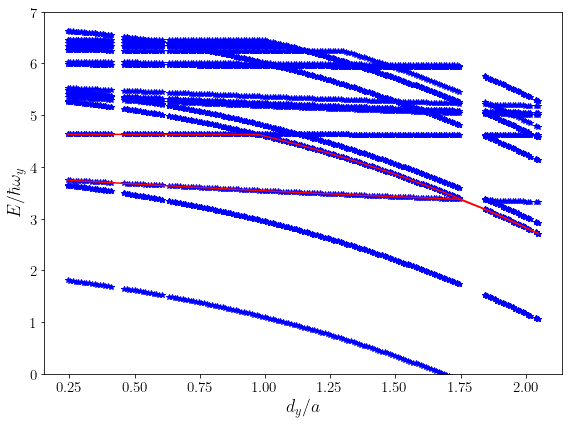

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b*')
ax.plot(x, dic['nivel_1006']/wy, 'r')
ax.plot(x, dic['nivel_1004']/wy, 'r')
ax.set_ylim(0, 7)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc.png', dpi=200)
plt.show()

In [31]:
delta[-1]

'.71400'

He lanzado los siguientes pa rellenar y expandir el intervalo:

`seq 70610 5 70650`

`seq 71300 5 71315`

`seq 71400 5 71600`

# Crosses

In [10]:
%matplotlib inline

1001
1002
1003
1004
1005
1006
1007
1008
1009


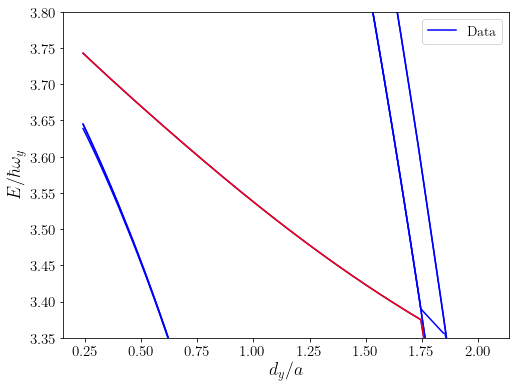

In [11]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+1, least_bound_pos + 10):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1004']/wy, 'r')
ax2.set_ylim(3.35, 3.8)
#ax2.set_xlim(1.7, 1.9)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.show()

In [15]:
delta[20]

'.70605'

1006
1007
1008
1009
1010
1011
1012
1013
1014


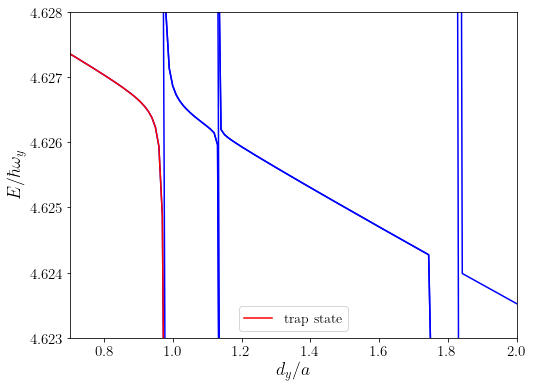

In [151]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos + 6, least_bound_pos + 15):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1006']/wy, 'r', label='trap state')
ax2.set_ylim(4.623, 4.628)
ax2.set_xlim(0.7, 2)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(fontsize=14)
plt.show()

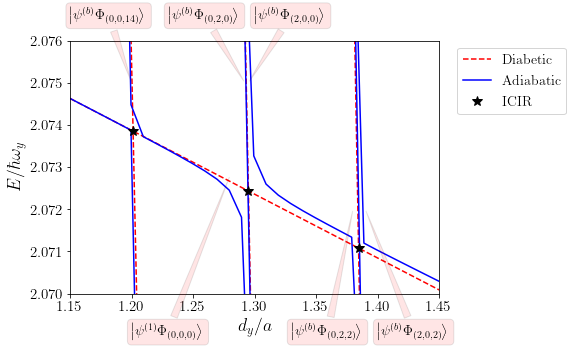

In [24]:
fig3, ax3 = plt.subplots(figsize=(5*aur,5))
# nivel 1056:
f1056 = np.polyfit(x[x < 1.2], np.array(dic['nivel_1056'])[x < 1.2]/wy, deg=1)
ax3.plot(x, np.polyval(f1056, x), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1056']/wy, 'b', label='Adiabatic')

# nivel 1057:
f1057 = np.polyfit(x[(x < 1.2) & (x > 1.05)], np.array(dic['nivel_1057'])[(x < 1.2) & (x > 1.05)]/wy, deg=1)
x1057 = np.linspace(1, 1.3, num=500)
ax3.plot(x1057, np.polyval(f1057, x1057), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1057']/wy, 'b')

# nivel 1058:
f1058 = np.polyfit(x[(x > 1.2) & (x < 1.3)], np.array(dic['nivel_1058'])[(x > 1.2) & (x < 1.3)]/wy, deg=1)
x1058 = np.linspace(1.2, 1.3, num=500)
ax3.plot(x1058, np.polyval(f1058, x1058), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1058']/wy, 'b')

# nivel 1059:
# proviene del mismo que el 1058
ax3.plot(x, dic['nivel_1059']/wy, 'b')

# nivel 1060:
f1060 = np.polyfit(x[(x > 1.3)], np.array(dic['nivel_1060'])[(x > 1.3)]/wy, deg=1)
x1060 = np.linspace(1.3, 1.4, num=500)
ax3.plot(x1060, np.polyval(f1060, x1060), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1060']/wy, 'b')

# nivel 1061:
# proviene del mismo que el 1060:
ax3.plot(x, dic['nivel_1061']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1056, f1057), np.polyval(f1056, cross_points(f1056, f1057)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1056, f1058), np.polyval(f1056, cross_points(f1056, f1058)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1060), np.polyval(f1056, cross_points(f1056, f1060)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,14)}\right>$', xy=(1.20, 2.075), xytext=(1.15, 2.0765), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.28, 2.0728), xytext=(1.2, 2.069), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.292, 2.075), xytext=(1.23, 2.0765), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.295, 2.075), xytext=(1.3, 2.0765), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.38, 2.072), xytext=(1.33, 2.069), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.39, 2.072), xytext=(1.4, 2.069), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2.07, 2.076)
ax3.set_xlim(1.15, 1.45)
plt.tight_layout()
#fig3.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Interpolation.png', dpi=200)

In [16]:
print(f'''Crosses between (x, E):
* 1056-1057: ({cross_points(f1056, f1057)}, {np.polyval(f1056, cross_points(f1056, f1057))})
* 1056-1058: ({cross_points(f1056, f1058)}, {np.polyval(f1056, cross_points(f1056, f1058))})
* 1056-1060: ({cross_points(f1056, f1060)}, {np.polyval(f1056, cross_points(f1056, f1060))})''')

Crosses between (x, E):
* 1056-1057: (1.2011988534700868, 2.073851969112394)
* 1056-1058: (1.2949507893419339, 2.0724342553151693)
* 1056-1060: (1.3845241120611258, 2.0710797303733504)


In [17]:
print(f"ICIR: asc/dy = {1/cross_points(f1056, f1058)}\nasc = {1/cross_points(f1056, f1058) * dho}")

ICIR: asc/dy = 0.7722301173376469
asc = 1341.8818577441878


In [13]:
np.savetxt('Results/ICIR_positions_4993_4993_4993.txt', [[1], [1/cross_points(f1056, f1058)], [np.polyval(f1056, cross_points(f1056, f1058))]], header='wx/wy, asc/dy, E/hwy', )

In [32]:
asc[16:18]
delta[16:18]

[0.7088, 0.70885]